# Example of pole placement for control of power-plant reservoir
We have plant model
$$ H(z) = \frac{1}{z(z-1)} $$
and controller
$$ F_b(z) = \frac{s_0z + s_1}{z + r_1} $$
Want closed-loop poles in $z=a$ and observer poles in the range $0<\alpha<a$.
### Diophantine equation
\begin{align}
  z(z-1)(z+r_1) + s_0z + s_1 &= z(z-0.9)^2\\
  z^3 - (1-r_1)z^2 + (s_0-r_1)z + s_1 &= z^3 - 1.8z^2 + 0.81z
\end{align}
Resulting equations when setting coefficients equal
\begin{align}
  1 - r_ 1 &= 1.8 \quad \Rightarrow \quad r_1 = -0.8\\
  s_0-r_1 &= 0.81 \quad \Rightarrow \quad s_0 = 0.01\\
  s_1 &= 0
\end{align}

### Feedforward part of controller
$$T(z) = t_0A_o(z) = t_0z$$
$$ G_c(z) = \frac{T(z)B(z)}{A_o(z)A_c(z)} = \frac{t_0 B(z)}{A_c(z)}, \quad \text{want}\, G_c(1)=1$$
$$t_0 = \frac{A_c(1)}{B(1)} = \frac{(1-0.9)^2}{1} = 0.01$$



In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import control.matlab as cm
%matplotlib notebook

## Symbolic solution

In [41]:
sy.init_printing()
aa, alphaa, hh, r1, s0, s1 = sy.symbols('a, alpha, h, r1, s0, s1', 
                                        real=True, positive=True)
zz = sy.symbols('z', real=False)

In [42]:
A = zz*(zz-1)
B = 1
R = zz+r1
S = s0*zz + s1
LHS = sy.Poly(A*R + B*S, zz)
LHS

In [43]:
RHS = sy.Poly(zz*(zz-alphaa)**2, zz)
Dioph = LHS-RHS
coeffs = Dioph.coeffs()
coeffs

In [44]:
sol = sy.solve(coeffs, [r1, s0])
sol

In [45]:
sol[r1].subs({alphaa: 0.9})

In [46]:
sol[s0].subs({alphaa: 0.9})

## Numerical solution

In [47]:
# Plant
a = 1
b = 1
h = 0.1
H = cm.tf([b], [1, -a,0 ], h)

# Desired closed-loop pole
alpha = 0.9

# Controller parameters
r_1 = -2*alpha +1 
s_0 = -2*alpha+1 +alpha**2
Fb = cm.tf([s_0, 0], [1, r_1], h)
Fb


0.01 z
-------
z - 0.8

dt = 0.1

In [48]:
t0 = (1-alpha)**2/1
Ff = cm.tf([t0, 0], [1, r_1], h)

In [49]:
# Check calculations
Hc = cm.minreal(Ff*cm.feedback(H, Fb))
cm.pole(Hc)

2 states have been removed from the model


array([0.9+4.59345062e-08j, 0.9-4.59345062e-08j])

In [50]:
Hcv = cm.feedback(1, H*Fb)
Hcn = cm.feedback(H*Fb, 1)

<IPython.core.display.Javascript object>


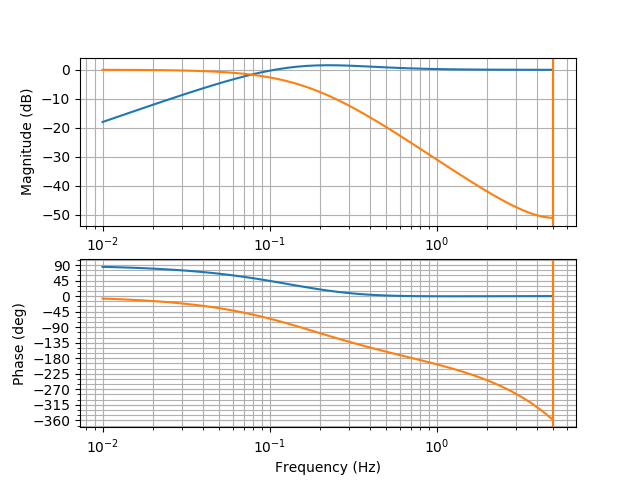

In [51]:
br, res = cm.rlocus(Fb*H)
plt.plot(np.real(br), np.imag(br))
plt.xlim((0,1.2))
plt.ylim((-1.2,1.2));

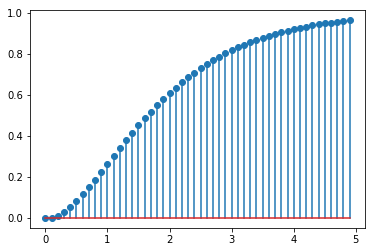

In [39]:
y, t = cm.step(Hc)
tt = h*np.arange(len(y))
plt.stem(tt[:50], y[:50]);

In [52]:
cm.bode(Hcv, Hcn);